Epoch 1/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - loss: 1.3042 - mae: 0.8729 - val_loss: 0.8397 - val_mae: 0.6802
Epoch 2/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.8702 - mae: 0.6619 - val_loss: 0.6173 - val_mae: 0.5798
Epoch 3/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.5924 - mae: 0.5473 - val_loss: 0.5480 - val_mae: 0.5326
Epoch 4/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.6209 - mae: 0.5272 - val_loss: 0.5164 - val_mae: 0.5045
Epoch 5/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.5426 - mae: 0.4894 - val_loss: 0.4975 - val_mae: 0.4875
Epoch 6/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.5227 - mae: 0.4756 - val_loss: 0.4830 - val_mae: 0.4785
Epoch 7/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.5161 - mae: 0.4571 - val_loss: 0.4717 - val_mae: 0.4710
Epoch 8/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.4785 - mae: 0.4379 - val_loss: 0.4617 - val_mae: 0.4649
Epoch 9/100
937/937 ━━━━━━━━━━━━

937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.3644 - mae: 0.3705 - val_loss: 0.3695 - val_mae: 0.3858
Epoch 54/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.3733 - mae: 0.3694 - val_loss: 0.3694 - val_mae: 0.3847
Epoch 55/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.3651 - mae: 0.3737 - val_loss: 0.3688 - val_mae: 0.3843
Epoch 56/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.3275 - mae: 0.3547 - val_loss: 0.3680 - val_mae: 0.3844
Epoch 57/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.3526 - mae: 0.3607 - val_loss: 0.3682 - val_mae: 0.3850
Epoch 58/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.3366 - mae: 0.3596 - val_loss: 0.3671 - val_mae: 0.3833
Epoch 59/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.4040 - mae: 0.3703 - val_loss: 0.3661 - val_mae: 0.3820
Epoch 60/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.3464 - mae: 0.3517 - val_loss: 0.3663 - val_mae: 0.3834
Epoch 61/100
937/937 ━━━━━━━━━━━━━━━━

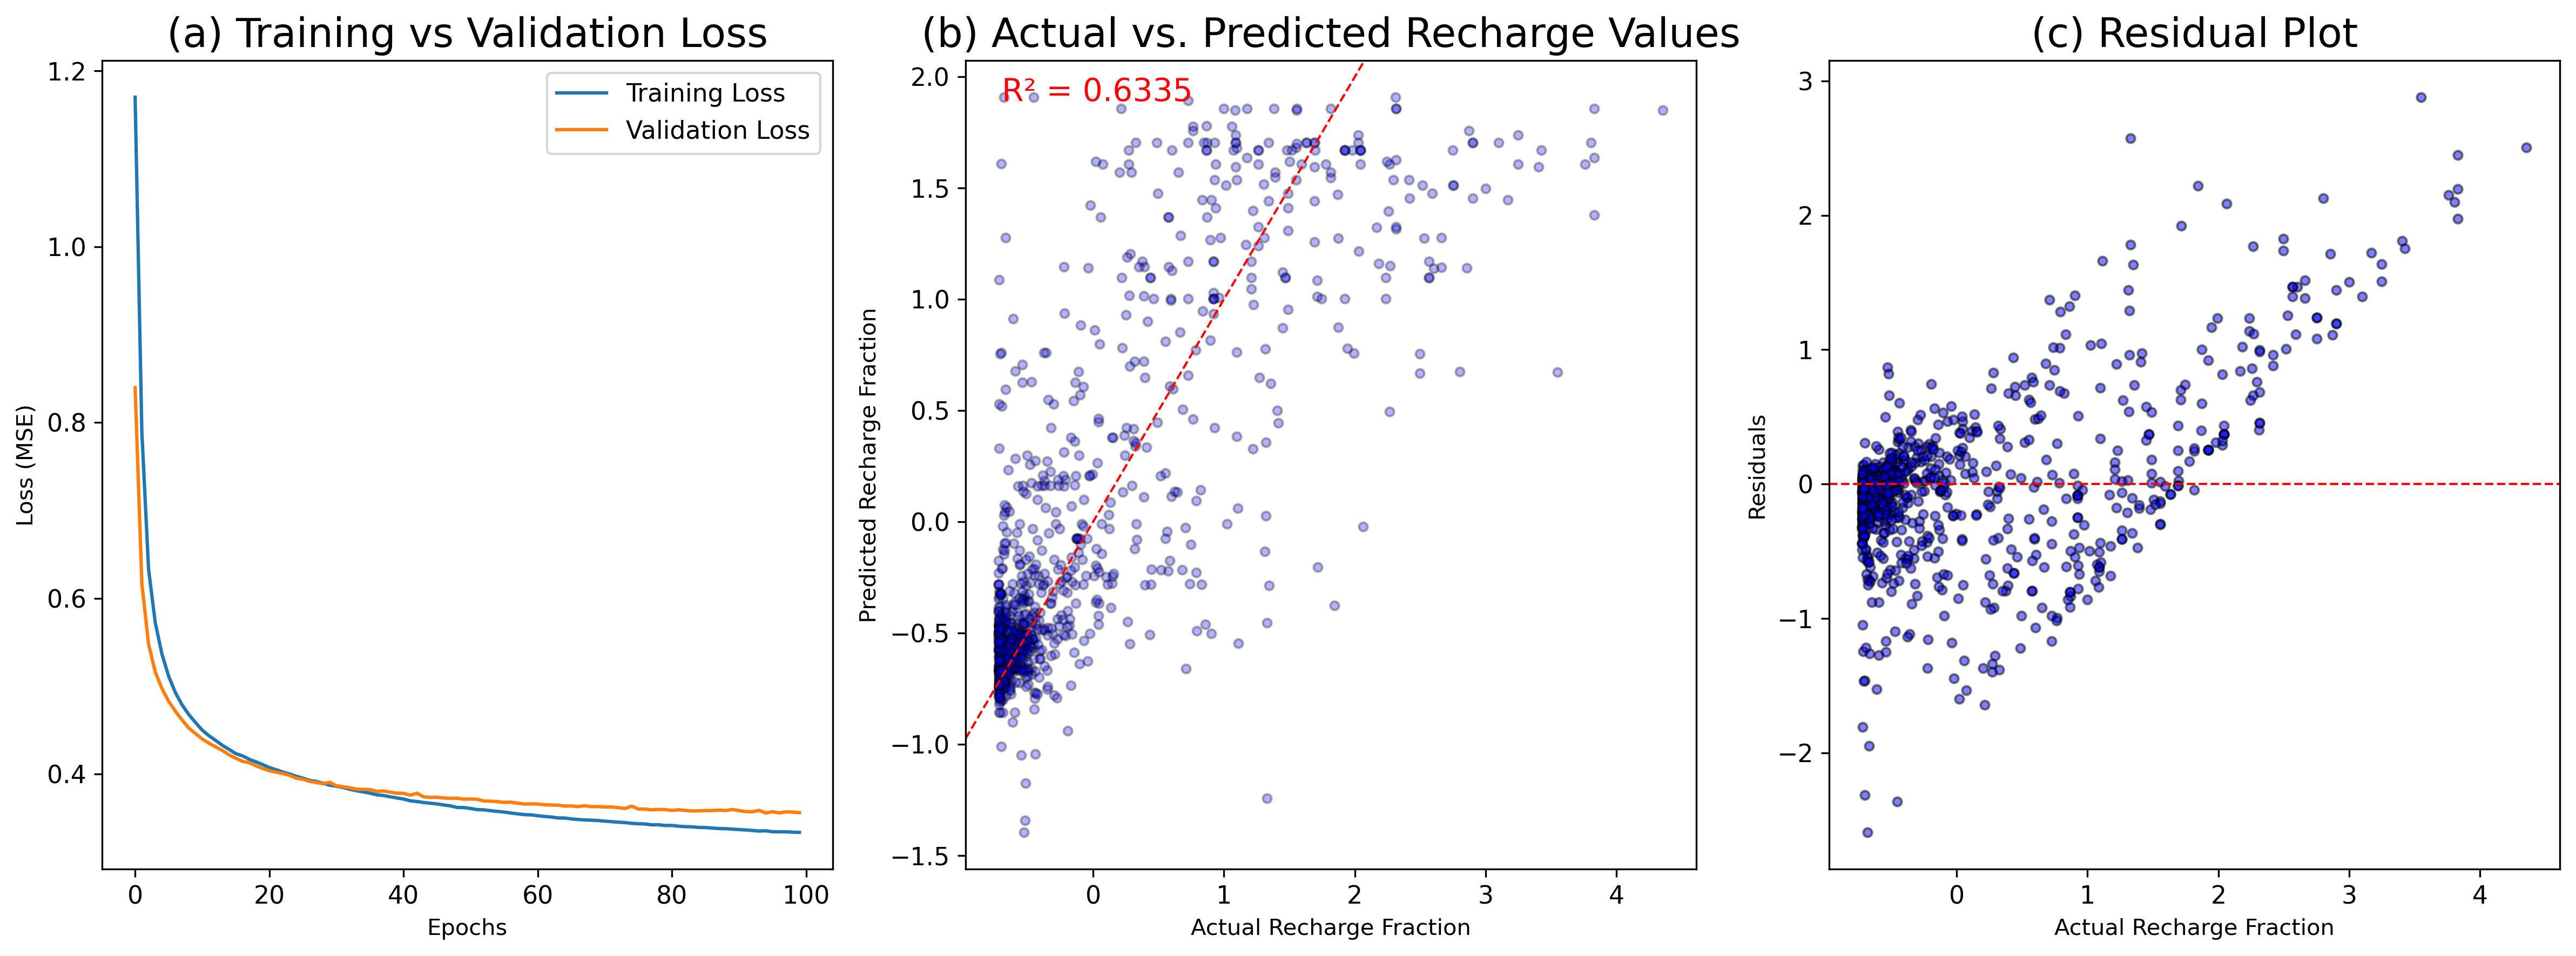

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy.stats import linregress
import shap
import matplotlib as mpl

# Set global plot font styles and resolution
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['legend.fontsize'] = 11

# Load data from the Excel file
df = pd.read_excel('Thesis_RechargeDataset_V7copy.xlsx')

# Remove NaN & infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Extract features (X) and target (y)
X = df[['PPT Int. Parameter-alpha', 'PPT Int. Parameter-a', 'PPT Int. Parameter-b',
        'PPT Int. Parameter-beta', 'Duration', 'Precipitation', 'ET_pot',
        'Prec_seasonality', 'Temp_seasonality', 'Aridity', 'DEM',
        'Depth to water table', 'Depth to bedrock', 'Sand content', 'Clay content',
        'Silt content', 'Slope', 'Topogrpahic wetness index', 'FAPAR ',
        'Landform', 'Landuse', 'Rock type']].values

y = df['Recharge fraction'].values

# Handle any remaining NaN or infinite values
X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
y = np.nan_to_num(y, nan=0.0, posinf=0.0, neginf=0.0)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalize y if not constant
if np.std(y) != 0:
    y = (y - np.mean(y)) / np.std(y)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Define Neural Network Model
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(16, kernel_initializer='he_normal'),
    LeakyReLU(negative_slope=0.1),
    keras.layers.Dense(8, kernel_initializer='he_normal'),
    LeakyReLU(negative_slope=0.1),
    keras.layers.Dense(1)
])

# Compile Model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='mse', metrics=['mae'])

# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=4,
                    validation_data=(X_test, y_test), verbose=1)

# Evaluate Model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

# Make Predictions
predictions = model.predict(X_test).flatten()

# R² Score and P-value
r2 = r2_score(y_test, predictions)
slope, intercept, r_value, p_value, std_err = linregress(y_test, predictions)
print(f"R²: {r2}")
print(f"P-value: {p_value}")

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(16, 6), dpi=300)

# Plot 1: Loss
axs[0].plot(history.history['loss'], label='Training Loss', linewidth=1.5)
axs[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=1.5)
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss (MSE)')
axs[0].set_title('(a) Training vs Validation Loss')
axs[0].legend()
#axs[0].grid(True)

# Plot 2: Actual vs Predicted
axs[1].scatter(y_test, predictions, alpha=0.3, s=15, color='blue', edgecolor='k')
axs[1].set_xlabel('Actual Recharge Fraction')
axs[1].set_ylabel('Predicted Recharge Fraction')
axs[1].set_title('(b) Actual vs. Predicted Recharge Values')
axs[1].axline((0, 0), slope=1, color='red', linestyle='--', linewidth=1)
axs[1].text(0.05, 0.95, f'R² = {r2:.4f}', transform=axs[1].transAxes, fontsize=14, color='red')
#axs[1].text(0.05, 0.88, f'P-value = {p_value:.3f}', transform=axs[1].transAxes, fontsize=11, color='darkred')
#axs[1].grid(True)

# Plot 3: Residuals
residuals = y_test - predictions
axs[2].scatter(y_test, residuals, alpha=0.5, s=15, color='blue', edgecolor='k')
axs[2].axhline(y=0, color='red', linestyle='--', linewidth=1)
axs[2].set_xlabel('Actual Recharge Fraction')
axs[2].set_ylabel('Residuals')
axs[2].set_title('(c) Residual Plot')
#axs[2].grid(True)

plt.tight_layout()

# Save high-quality image
#plt.savefig("subplot_correlation_highres.png", dpi=400, bbox_inches='tight')

plt.show()


# Implement XAI to explain the model


Generating SHAP explanations...


PermutationExplainer explainer: 939it [00:16, 22.78it/s]                        


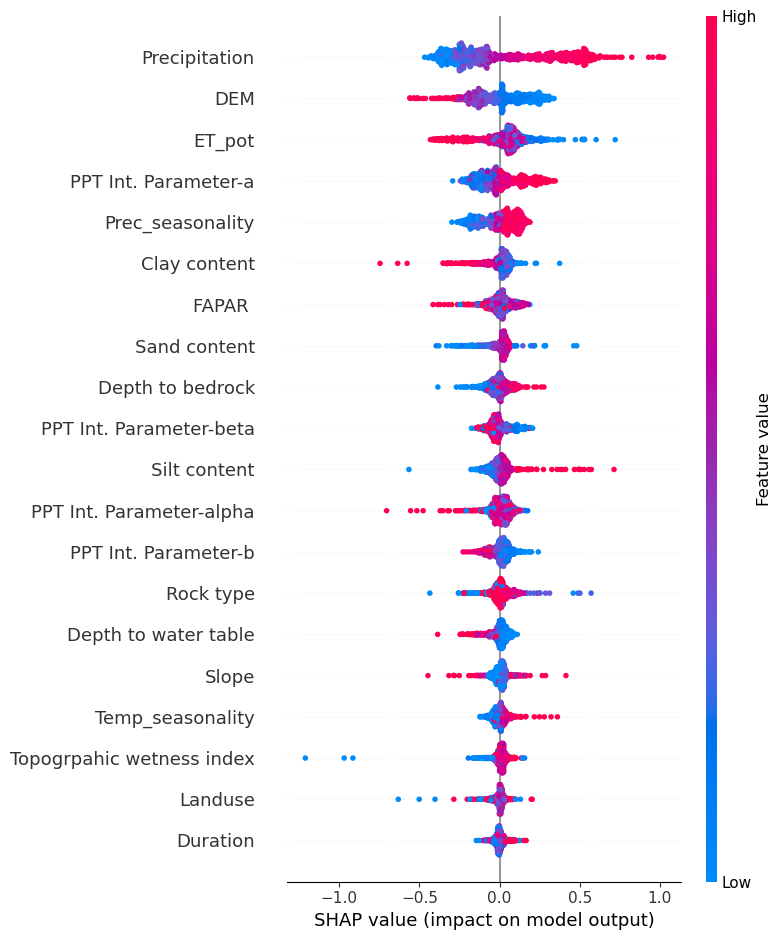

IndexError: tuple index out of range

In [83]:
# SHAP Explainability 
print("\nGenerating SHAP explanations...")

# Create SHAP Explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)  # Compute SHAP values for test set

feature_names = ['PPT Int. Parameter-alpha', 'PPT Int. Parameter-a', 'PPT Int. Parameter-b', 'PPT Int. Parameter-beta', 'Duration', 'Precipitation','ET_pot', 'Prec_seasonality', 'Temp_seasonality', 'Aridity', 'DEM','Depth to water table', 'Depth to bedrock', 'Sand content', 'Clay content','Silt content', 'Slope', 'Topogrpahic wetness index', 'FAPAR ','Landform', 'Landuse', 'Rock type']

# Summary Plot: Shows global feature importance
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

# Dependence Plot: Shows how a single feature affects the output
shap.dependence_plot(0, shap_values, X_test, feature_names=feature_names)

# Force Plot: Explaining a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], feature_names=feature_names)

# Saving figures 
#plt.savefig("subplot_correlation.png", dpi=300, bbox_inches='tight')
